# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [411]:
# Install the required libraries
!pip install prophet

In [412]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

ANSWER:

MercadoLibre released its first quarterly results on May 5, 2020. Based on the visual plot of the month search trends i would infer there is a spike in searches the date of the release of the financial statements.

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [413]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()



# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-413-49bb58bfbc5c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


<Axes: xlabel='Date'>

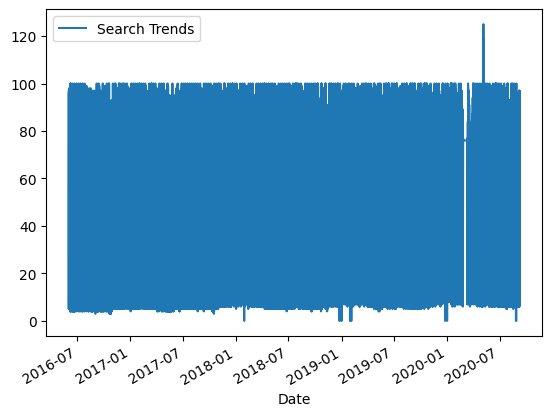

In [414]:
df_mercado_trends.plot()

In [415]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [416]:
df_mercado_trends.columns

Index(['Search Trends'], dtype='object')

<Axes: xlabel='Date'>

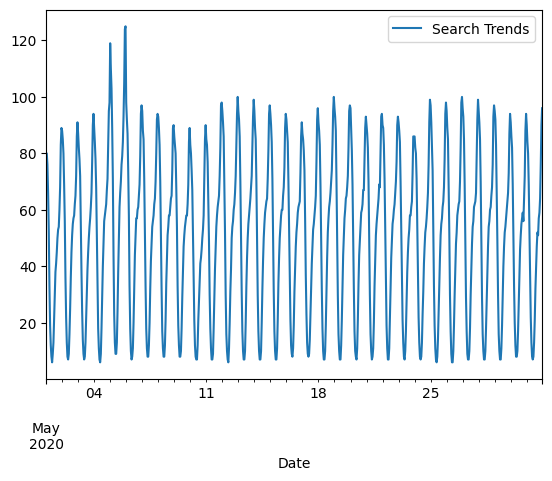

In [417]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends.loc["2020-05-01":"2020-05-31"]
# Plot to visualize the data for May 2020
df_mercado_trends['2020-5-01':'2020-05-31'].plot()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [418]:
# Calculate the sum of the total search traffic for May 2020
df_mercado_trends['2020-5-01':'2020-05-31'].sum()

# View the traffic_may_2020 value
traffic_may_2020 = df_mercado_trends['Search Trends'].sum()

traffic_may_2020

1785865

In [419]:
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)
# Calcluate the monthly median search traffic across all months
monthly_median_traffic = df_mercado_trends['Search Trends'].resample('M').median()



# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
print("Monthly Median Search Traffic:")
print(monthly_median_traffic)


# View the median_monthly_traffic value
overall_median = monthly_median_traffic.median()
print("overall median of monthly search trends:", overall_median)

Monthly Median Search Traffic:
Date
2016-06-30    50.0
2016-07-31    48.5
2016-08-31    50.0
2016-09-30    47.0
2016-10-31    45.0
2016-11-30    51.0
2016-12-31    48.0
2017-01-31    47.0
2017-02-28    51.0
2017-03-31    51.0
2017-04-30    47.0
2017-05-31    47.0
2017-06-30    50.5
2017-07-31    49.0
2017-08-31    51.0
2017-09-30    49.0
2017-10-31    44.0
2017-11-30    51.0
2017-12-31    50.0
2018-01-31    54.0
2018-02-28    53.0
2018-03-31    51.0
2018-04-30    52.0
2018-05-31    49.0
2018-06-30    49.0
2018-07-31    51.5
2018-08-31    54.0
2018-09-30    51.0
2018-10-31    52.0
2018-11-30    50.0
2018-12-31    51.0
2019-01-31    57.0
2019-02-28    56.0
2019-03-31    54.0
2019-04-30    54.0
2019-05-31    50.0
2019-06-30    55.0
2019-07-31    55.0
2019-08-31    55.5
2019-09-30    53.0
2019-10-31    55.0
2019-11-30    54.5
2019-12-31    54.0
2020-01-31    57.0
2020-02-29    56.0
2020-03-31    52.0
2020-04-30    53.0
2020-05-31    54.0
2020-06-30    53.0
2020-07-31    50.0
2020-08-31    

In [420]:
"Search Trends" in df_mercado_trends.columns

True

In [421]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
grouped_monthly_median_traffic = monthly_median_traffic.groupby([monthly_median_traffic.index.year, monthly_median_traffic.index.month])
may_2020_traffic = monthly_median_traffic.to_frame().loc['2020-05-31']
may_2020_traffic = may_2020_traffic["Search Trends"].sum()
print("Search Traffic for May 2020:", may_2020_traffic)

Search Traffic for May 2020: 54.0


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** The Google search traffic increased during the mont of May when Mercado released its quarterly financial results (Search Traffic May 2020 = 54.0, overall monthly median 51.0)

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [422]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

hourly_search_df = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

hourly_search_df['hour'] = hourly_search_df.index.hour
hourly_search_df['day_of_week'] = hourly_search_df.index.day_name()


average_hourly_traffic = hourly_search_df.groupby(['day_of_week', 'hour']).mean()
order =  ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
average_hourly_traffic = average_hourly_traffic.reindex(order, level='day_of_week')


print(average_hourly_traffic)

<ipython-input-422-8c237c1c610c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_search_df = pd.read_csv(


                  Search Trends
day_of_week hour               
Monday      0         86.923077
            1         81.977376
            2         74.488688
            3         60.742081
            4         42.380090
...                         ...
Sunday      19        50.615385
            20        54.877828
            21        63.886878
            22        77.122172
            23        86.832579

[168 rows x 1 columns]


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day_of_week,hour'>

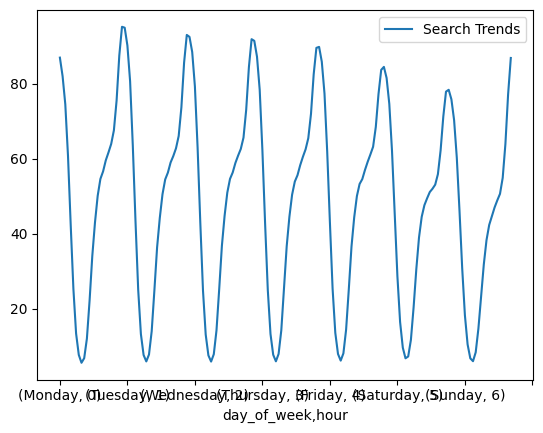

In [423]:
average_hourly_traffic.plot()

In [424]:
%whos

Variable                         Type             Data/Info
-----------------------------------------------------------
Prophet                          type             <class 'prophet.forecaster.Prophet'>
average_hourly_traffic           DataFrame                          Search <...>n\n[168 rows x 1 columns]
data                             dict             n=2
df_mercado_stock                 DataFrame                                c<...>\n[9336 rows x 1 columns]
df_mercado_trends                DataFrame                             Sear<...>n[37106 rows x 1 columns]
dt                               module           <module 'datetime' from '<...>/python3.10/datetime.py'>
fig                              Figure           Figure(3600x1800)
forecast                         DataFrame                    ds          y<...>\n[1000 rows x 2 columns]
forecast_canada                  DataFrame                     ds      tren<...>n[1365 rows x 19 columns]
future                           Da

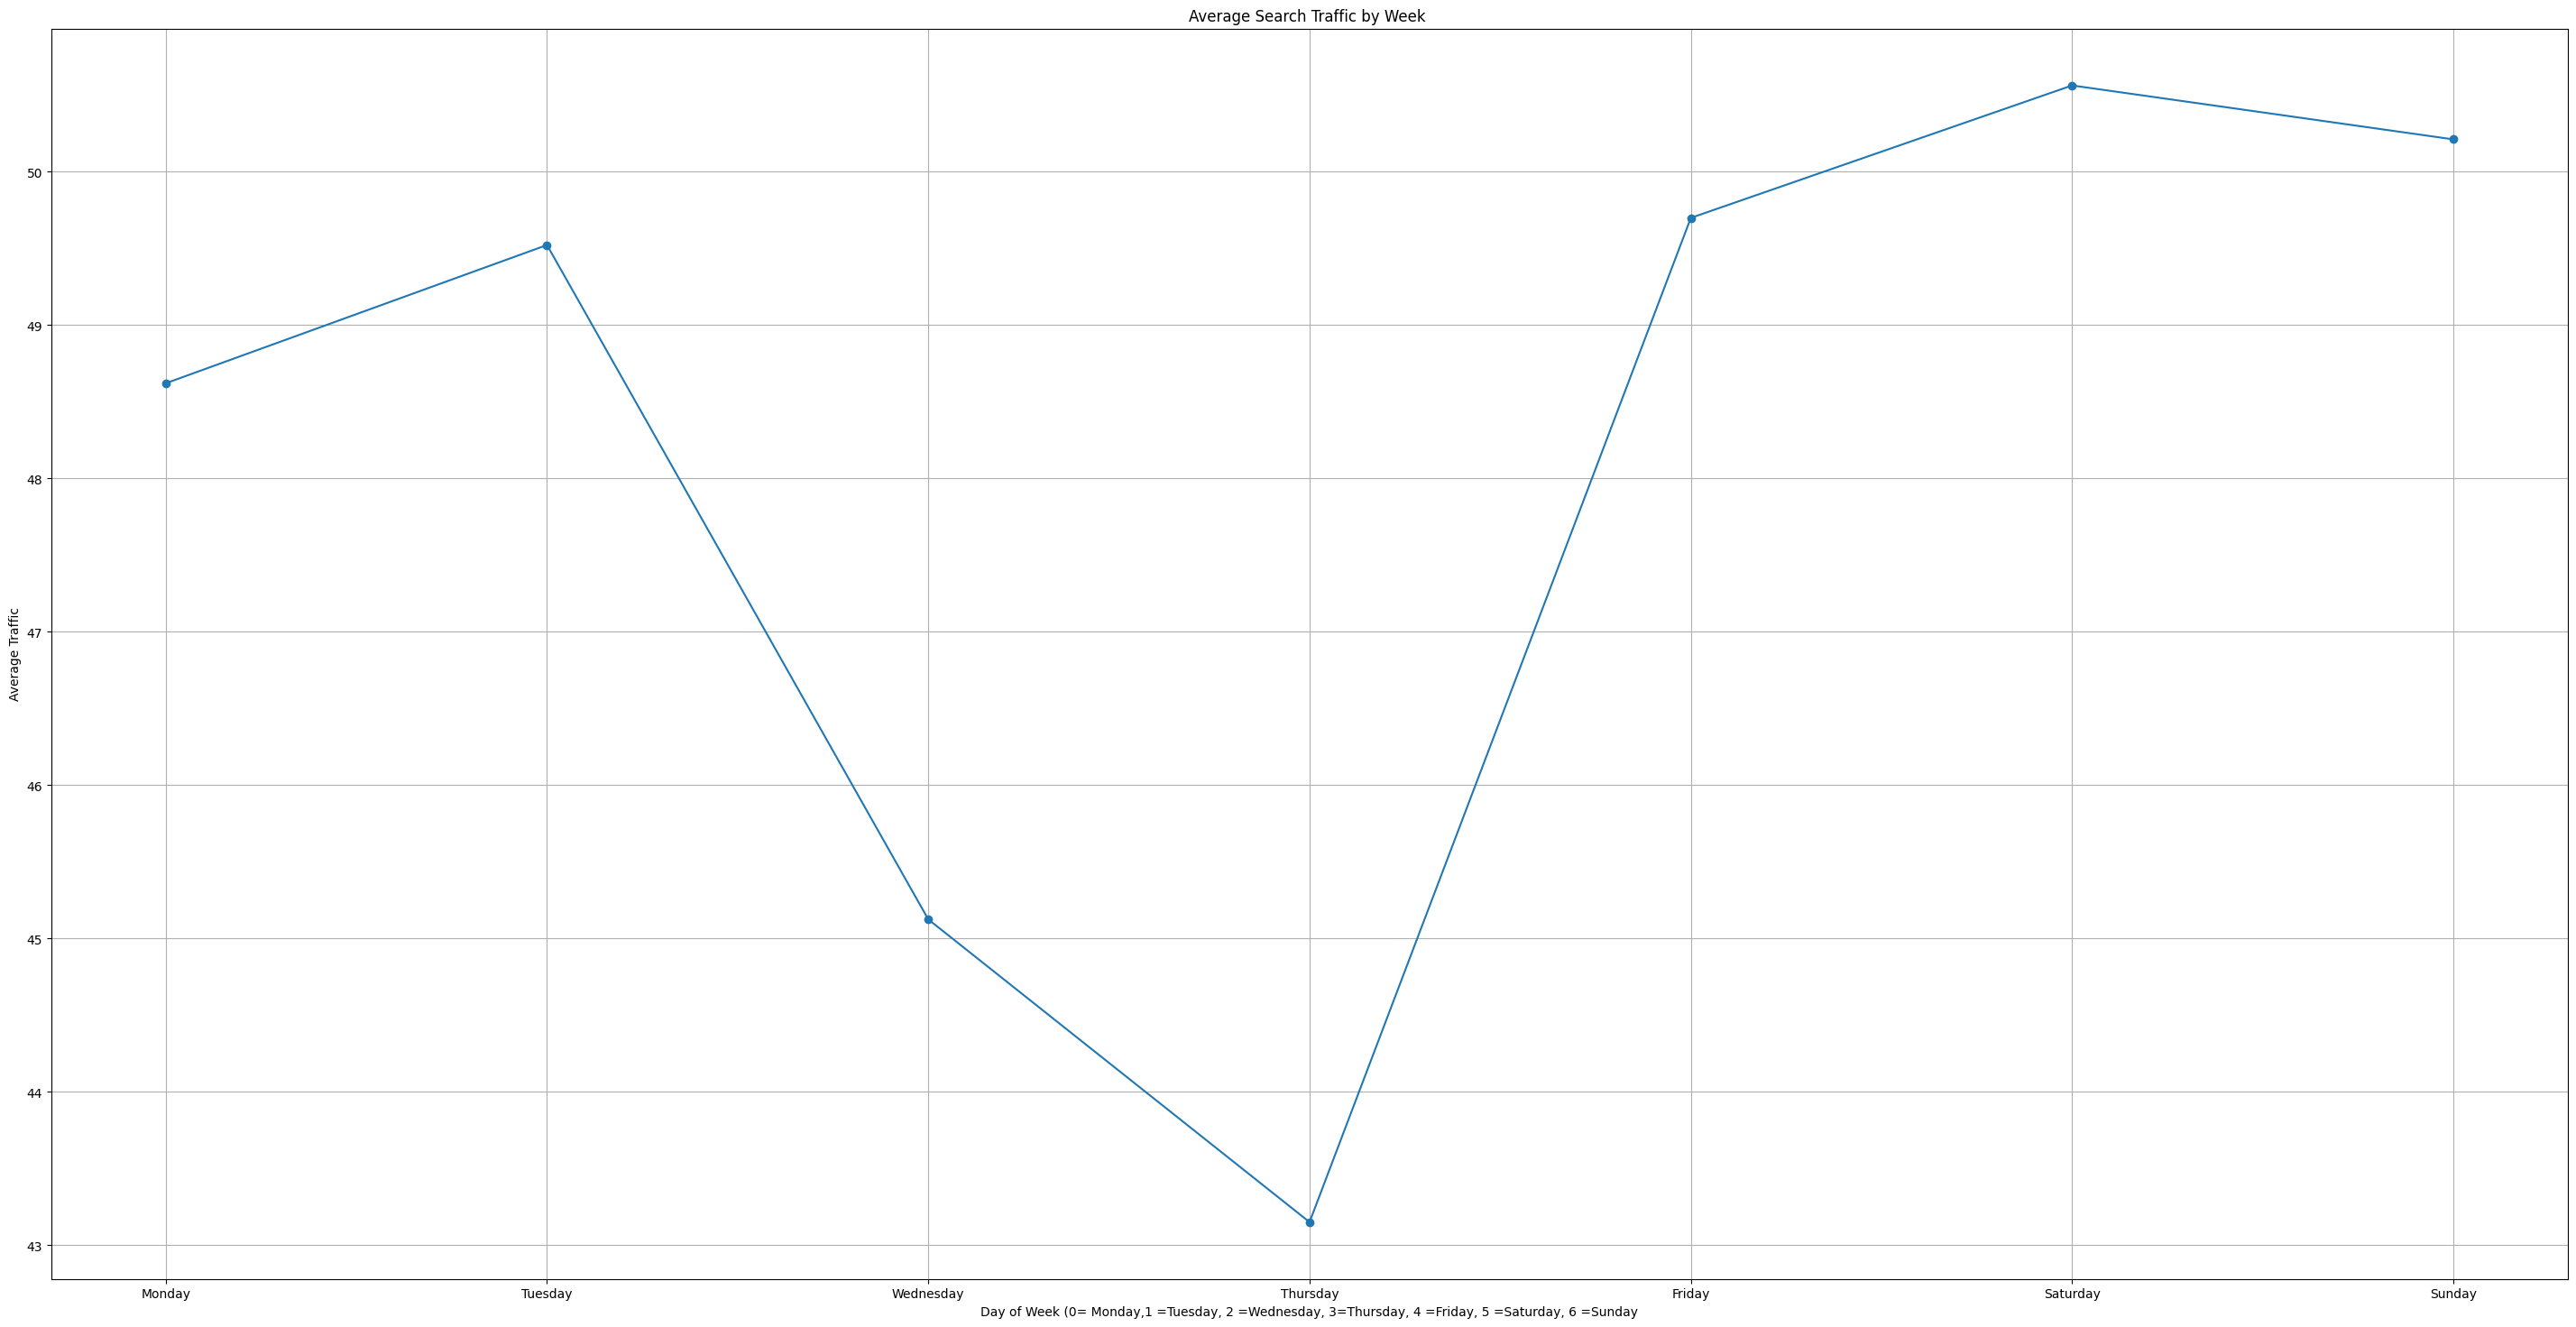

In [425]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

weekly_avg_traffic = average_hourly_traffic.reset_index().groupby('day_of_week').mean()
fig = plt.figure(figsize=(36,18))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic['Search Trends'], marker='o')
plt.xlabel('Day of Week (0= Monday,1 =Tuesday, 2 =Wednesday, 3=Thursday, 4 =Friday, 5 =Saturday, 6 =Sunday')
plt.ylabel('Average Traffic')
plt.title('Average Search Traffic by Week ')
plt.xticks(range(7), ['Monday','Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday'])
plt.grid(True)
plt.show()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

In [426]:
average_hourly_traffic.columns

Index(['Search Trends'], dtype='object')

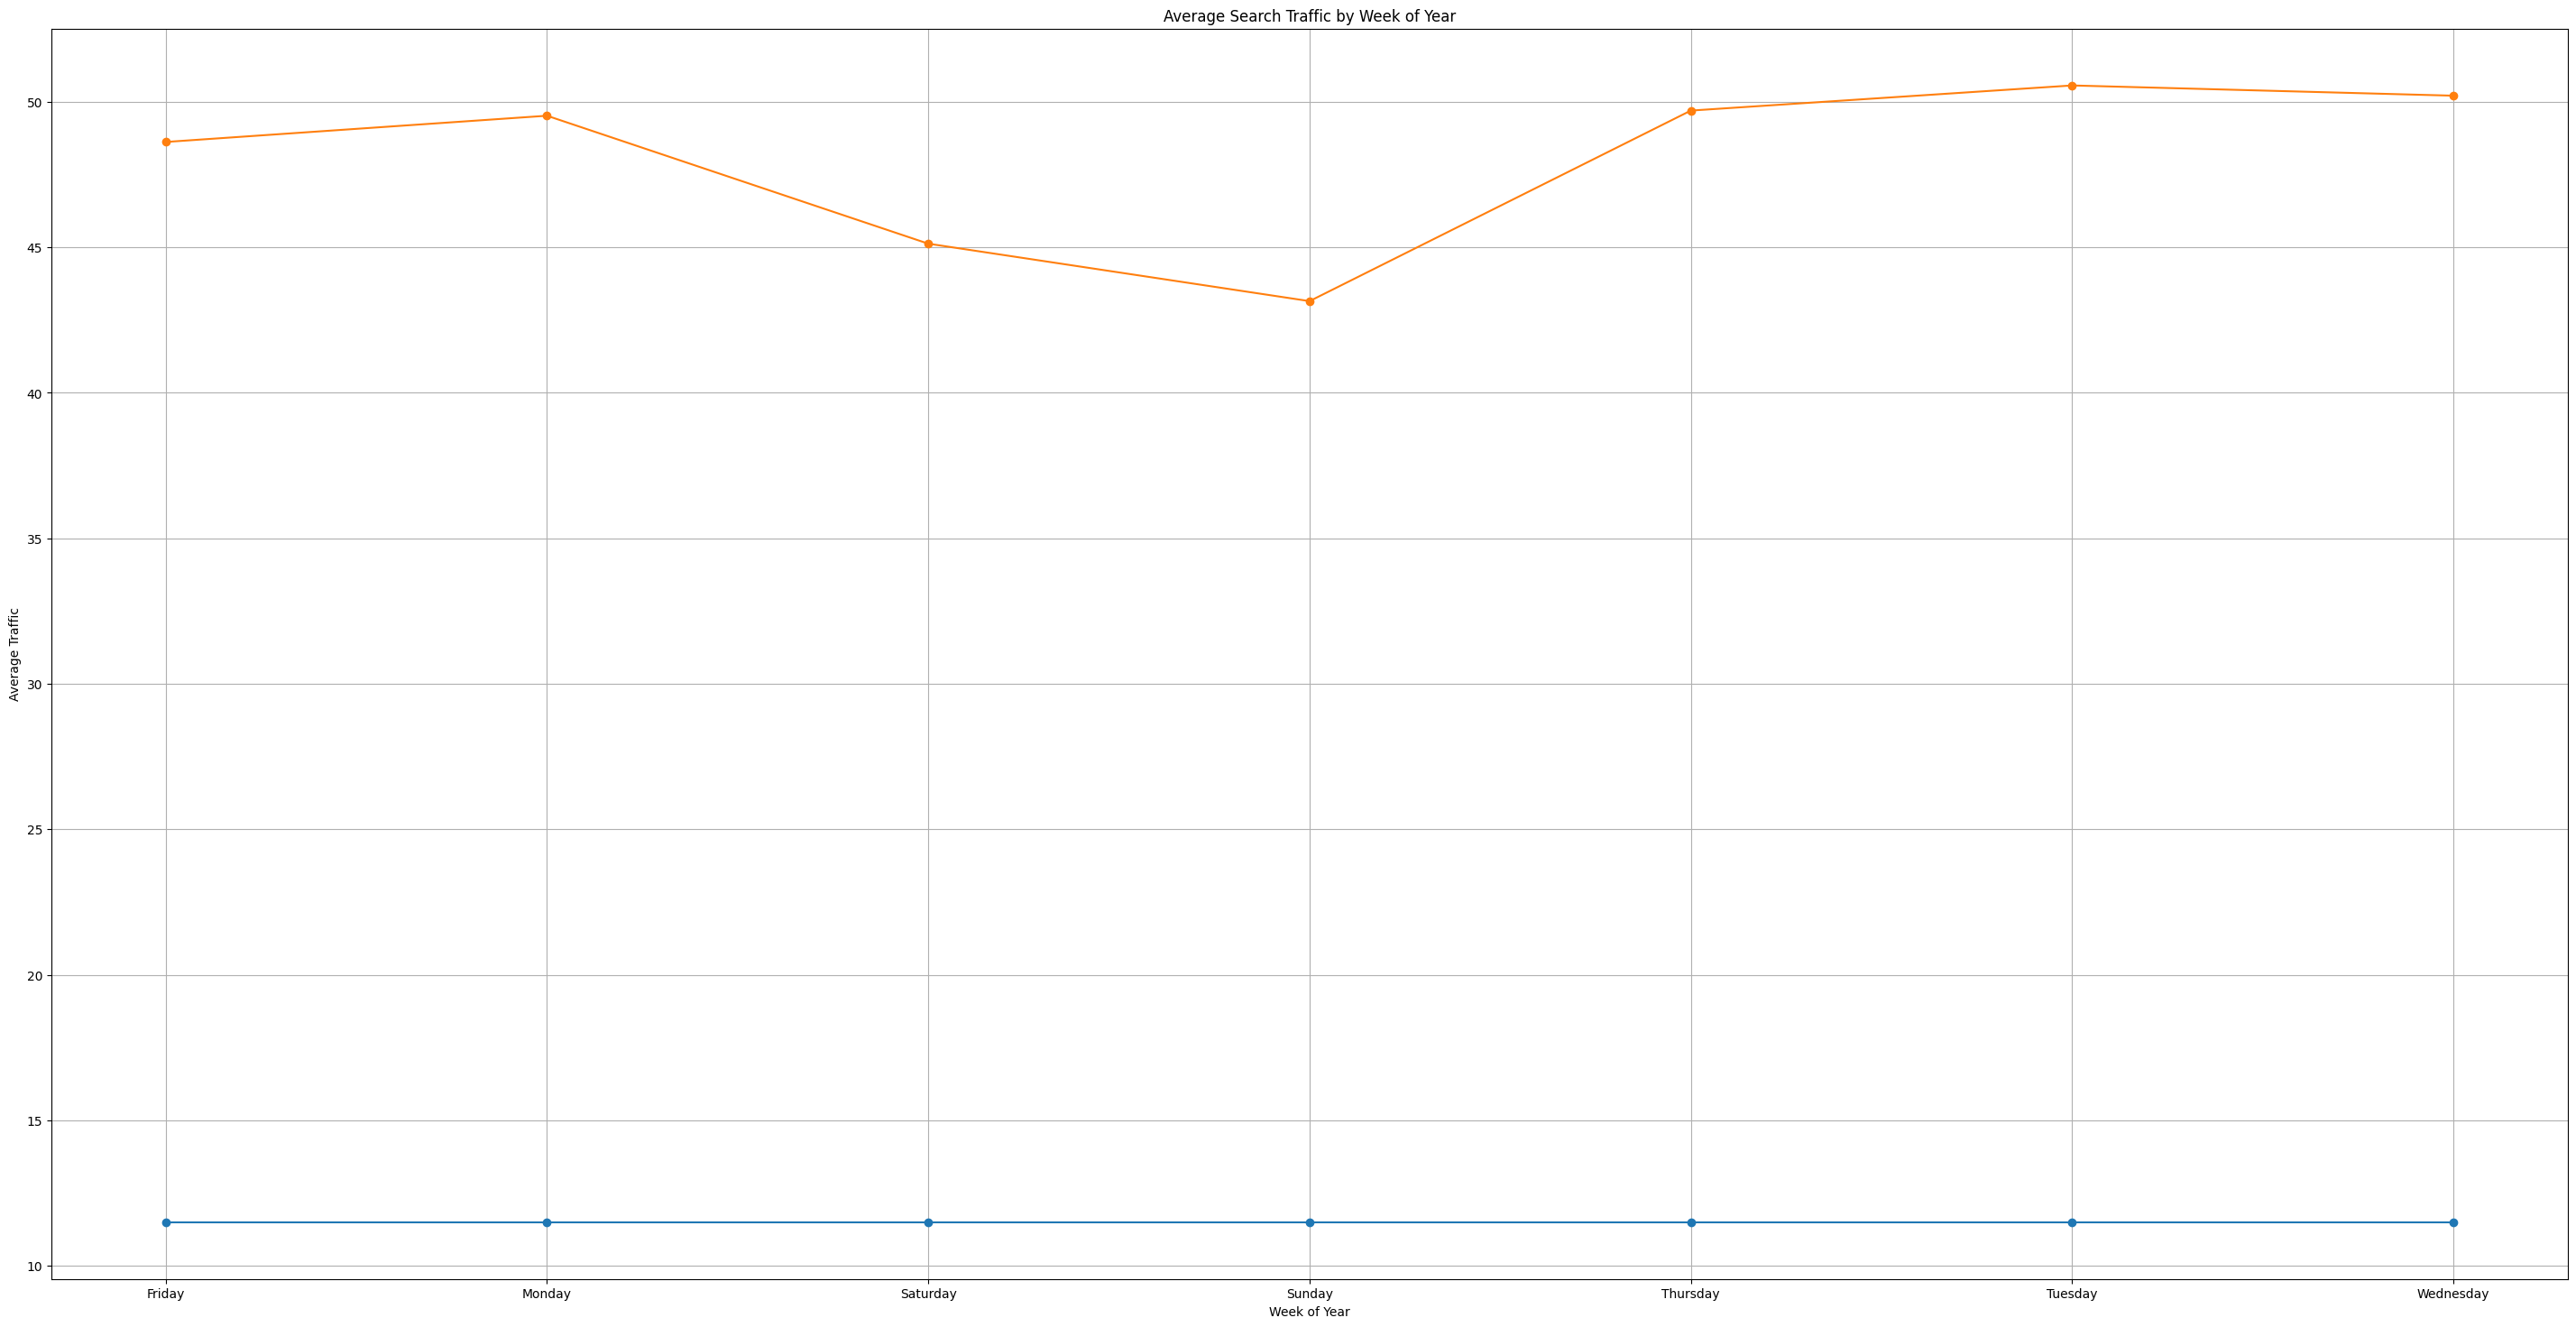

In [427]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
weekly_avg_traffic = average_hourly_traffic.reset_index().groupby('day_of_week').mean()

if 'date' in average_hourly_traffic.columns:
    average_hourly_traffic['week_of_year'] = average_hourly_traffic['date'].dt.isocalendar().week




fig = plt.figure(figsize=(36,18))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic.values, marker='o')
plt.xlabel('Week of Year')
plt.ylabel('Average Traffic')
plt.title('Average Search Traffic by Week of Year')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

There is a trend of decreased searches over the weekend (Saturday/Sunday), with the highest peak on Tuesday.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [428]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
     index_col='date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

<ipython-input-428-bee2ce319d29>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_stock = pd.read_csv(


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

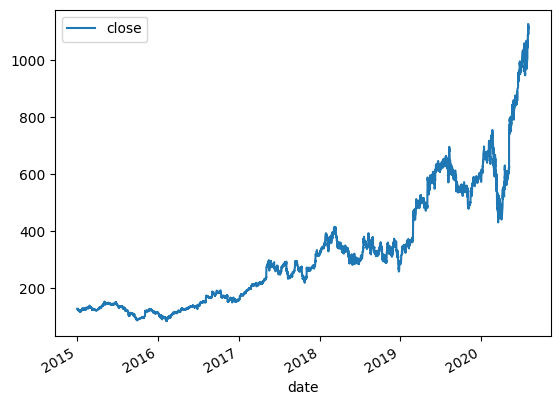

In [429]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [430]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame

joined_data_rows = pd.concat([df_mercado_stock, df_mercado_trends], axis="rows",
                             join="inner")

# Concatenate the DataFrame by columns (axis=1), and drop any rows with only one column of data
joined_data_cols = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)
joined_data_cols.dropna(axis=0, how="any", inplace=True)


# View the first and last five rows of the DataFrame
print("First five rows:")

display(joined_data_cols.head())

print("Last five rows:")
display(joined_data_cols.tail())

First five rows:


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


Last five rows:


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [431]:
sliced_data = joined_data_cols["2020-01": "2020-06"]
print("First five rows:")

display(sliced_data.head())

print("Last five rows:")
display(sliced_data.tail())

First five rows:


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


Last five rows:


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


In [432]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
sliced_data = joined_data_cols["2020-01": "2020-06"]
print("First five rows:")


# View the first and last five rows of first_half_2020 DataFrame

display(sliced_data.head())

print("Last five rows:")
display(sliced_data.tail())

First five rows:


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


Last five rows:


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

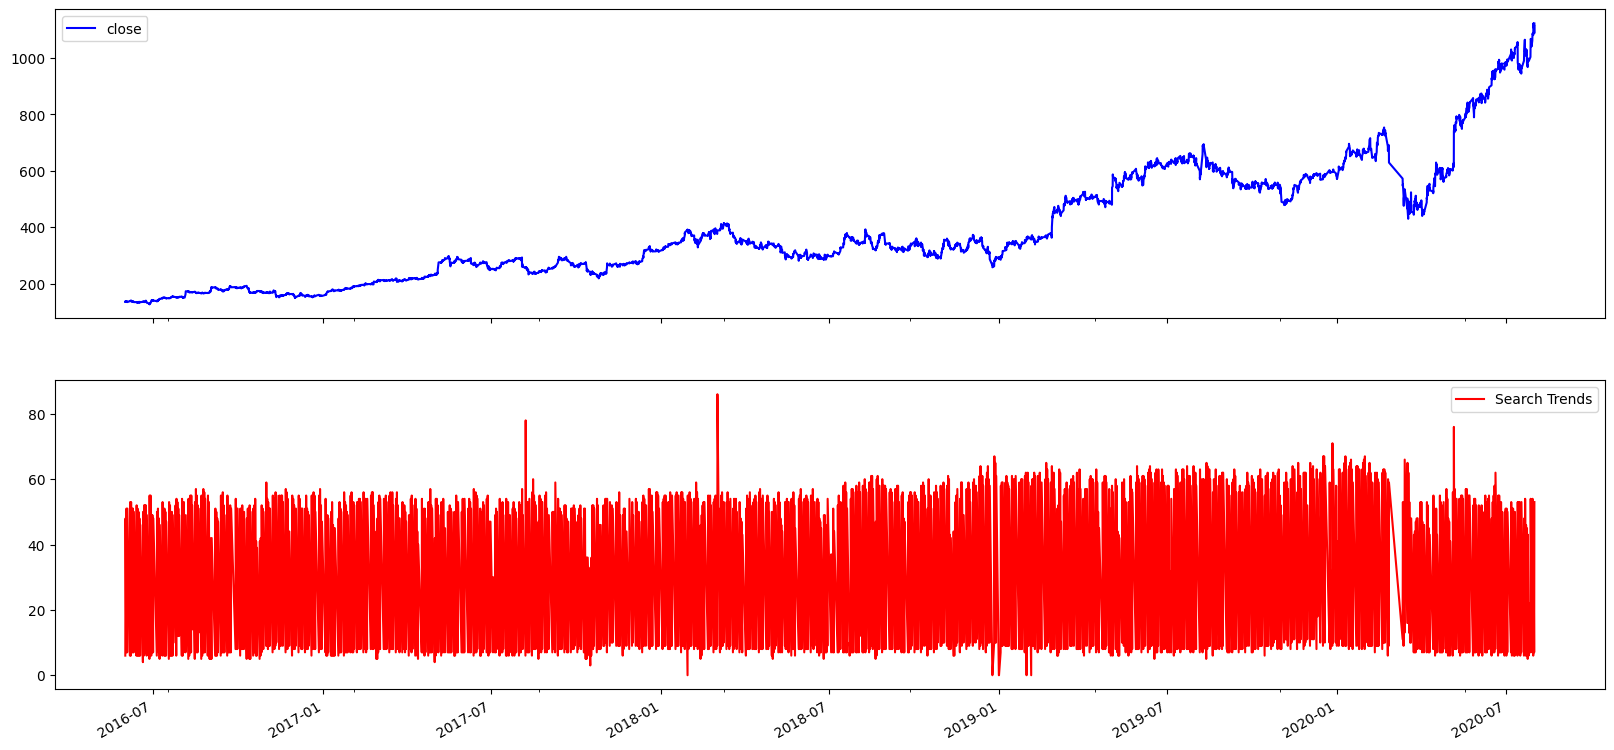

In [433]:
# Visualize the close and Search Trends data
joined_data_cols[['close', 'Search Trends']].plot(subplots=True, figsize=[20, 10], color=['blue', 'red'])
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
Yes, both the close and search trends time series show an upward trend from 2016 to 2021.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [434]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends

df_mercado_trends['Lagged Search Trends'] = df_mercado_trends['Search Trends'].shift(1)
# This column should shift the Search Trends information by one hour


df_mercado_trends.head()


,Search Trends,Lagged Search Trends
Date,,
2016-06-01 00:00:00,97,NaN
2016-06-01 01:00:00,92,97.0
2016-06-01 02:00:00,76,92.0
2016-06-01 03:00:00,60,76.0
2016-06-01 04:00:00,38,60.0


In [435]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_trends['returns']= df_mercado_trends['Search Trends'].pct_change()
df_mercado_trends['Stock Volatility'] = df_mercado_trends['returns'].rolling(window=4).std()
print(df_mercado_trends.head())

                     Search Trends  Lagged Search Trends   returns  \
Date                                                                 
2016-06-01 00:00:00             97                   NaN       NaN   
2016-06-01 01:00:00             92                  97.0 -0.051546   
2016-06-01 02:00:00             76                  92.0 -0.173913   
2016-06-01 03:00:00             60                  76.0 -0.210526   
2016-06-01 04:00:00             38                  60.0 -0.366667   

                     Stock Volatility  
Date                                   
2016-06-01 00:00:00               NaN  
2016-06-01 01:00:00               NaN  
2016-06-01 02:00:00               NaN  
2016-06-01 03:00:00               NaN  
2016-06-01 04:00:00          0.129879  


array([<Axes: xlabel='Date'>], dtype=object)

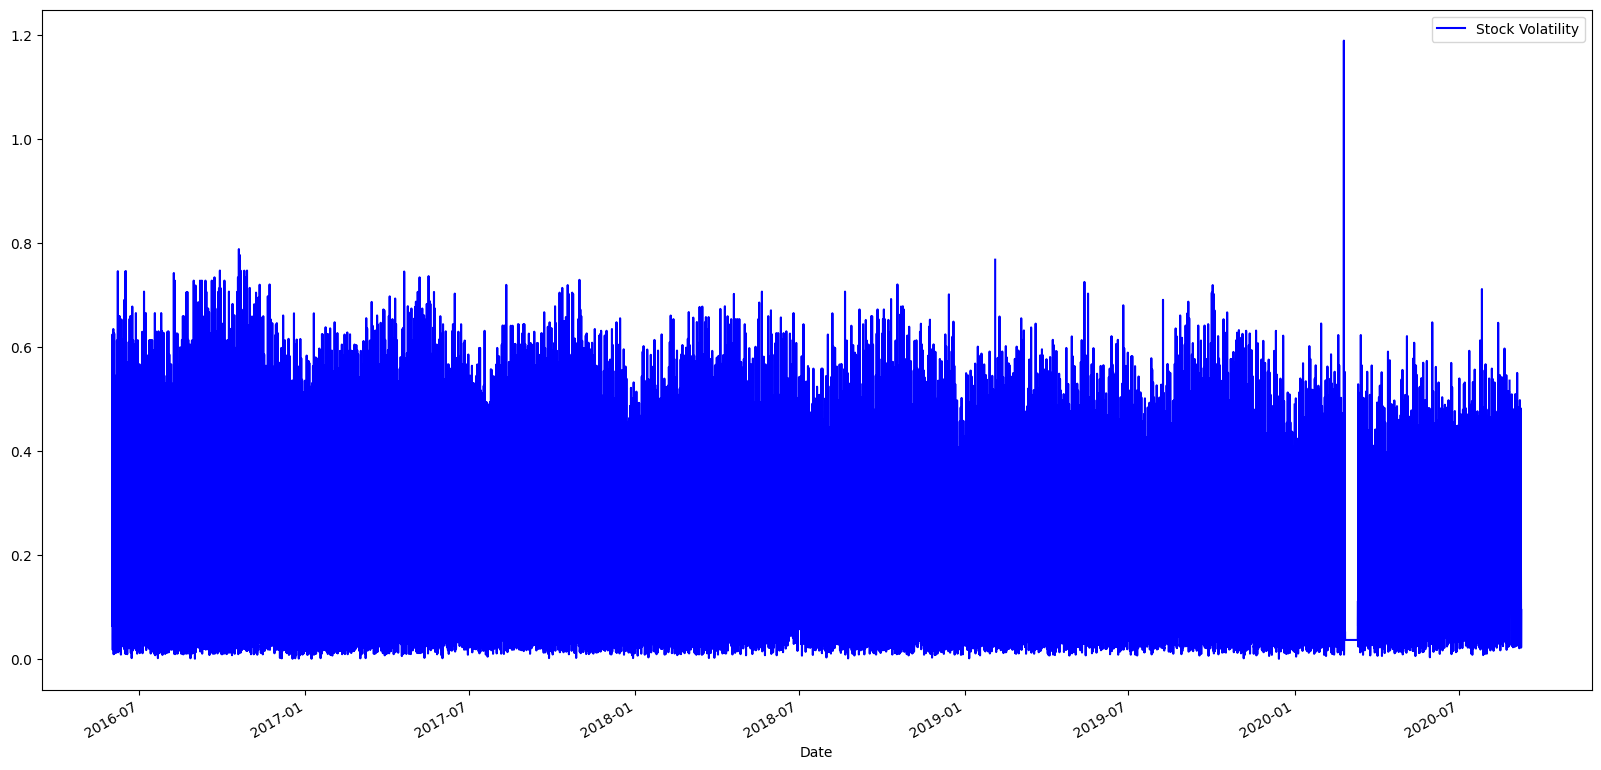

In [436]:
# Visualize the stock volatility
df_mercado_trends[['Stock Volatility']].plot(subplots=True, figsize=[20, 10], color=['blue', 'red'])


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [437]:
df_mercado_trends["Hourly Stock Return"] = df_mercado_trends["Search Trends"]
df_mercado_trends
# This column should calculate hourly return percentage of the closing price



,Search Trends,Lagged Search Trends,returns,Stock Volatility,Hourly Stock Return
Date,,,,,
2016-06-01 00:00:00,97,NaN,NaN,NaN,97
2016-06-01 01:00:00,92,97.0,-0.051546,NaN,92
2016-06-01 02:00:00,76,92.0,-0.173913,NaN,76
2016-06-01 03:00:00,60,76.0,-0.210526,NaN,60
2016-06-01 04:00:00,38,60.0,-0.366667,0.129879,38
...,...,...,...,...,...
2020-09-07 20:00:00,71,69.0,0.028986,0.022100,71
2020-09-07 21:00:00,83,71.0,0.169014,0.061839,83
2020-09-07 22:00:00,96,83.0,0.156627,0.066390,96


In [438]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame

print("First five rows:")
display(df_mercado_trends.head())

# View the first and last five rows of first_half_2020 DataFrame



print("Last five rows:")
display(df_mercado_trends.tail())

First five rows:


,Search Trends,Lagged Search Trends,returns,Stock Volatility,Hourly Stock Return
Date,,,,,
2016-06-01 00:00:00,97,NaN,NaN,NaN,97
2016-06-01 01:00:00,92,97.0,-0.051546,NaN,92
2016-06-01 02:00:00,76,92.0,-0.173913,NaN,76
2016-06-01 03:00:00,60,76.0,-0.210526,NaN,60
2016-06-01 04:00:00,38,60.0,-0.366667,0.129879,38


Last five rows:


,Search Trends,Lagged Search Trends,returns,Stock Volatility,Hourly Stock Return
Date,,,,,
2020-09-07 20:00:00,71,69.0,0.028986,0.022100,71
2020-09-07 21:00:00,83,71.0,0.169014,0.061839,83
2020-09-07 22:00:00,96,83.0,0.156627,0.066390,96
2020-09-07 23:00:00,97,96.0,0.010417,0.083131,97
2020-09-08 00:00:00,96,97.0,-0.010309,0.094489,96


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [439]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_trends[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.597481,-0.500795
Lagged Search Trends,-0.597481,1.000000,0.945795
Hourly Stock Return,-0.500795,0.945795,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
The data is inferring that there is an inverse correlation between stock volatility and and lagged search trends. When stock volatiility is high, lagged search trends are low. When stock volatility is low, lagged search trends are high.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [440]:
df_mercado_trends.columns

Index(['Search Trends', 'Lagged Search Trends', 'returns', 'Stock Volatility',
       'Hourly Stock Return'],
      dtype='object')

In [441]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

df_mercado_trends = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends.rename(columns={'Date':'ds','Search Trends': 'y'}, inplace=True)
df_mercado_trends.head()
# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends = df_mercado_trends.dropna()


# View the first and last five rows of the mercado_prophet_df DataFrame
df_mercado_trends.head()
df_mercado_trends.tail()

,ds,y,Lagged Search Trends,returns,Stock Volatility,Hourly Stock Return
37101,2020-09-07 20:00:00,71,69.0,0.028986,0.022100,71
37102,2020-09-07 21:00:00,83,71.0,0.169014,0.061839,83
37103,2020-09-07 22:00:00,96,83.0,0.156627,0.066390,96
37104,2020-09-07 23:00:00,97,96.0,0.010417,0.083131,97
37105,2020-09-08 00:00:00,96,97.0,-0.010309,0.094489,96


In [442]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [443]:
# Fit the time-series model.
m.fit(df_mercado_trends)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2dac9m0/cbw5gplp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2dac9m0/ld62miry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10261', 'data', 'file=/tmp/tmpx2dac9m0/cbw5gplp.json', 'init=/tmp/tmpx2dac9m0/ld62miry.json', 'output', 'file=/tmp/tmpx2dac9m0/prophet_model25futpx4/prophet_model-20240517231033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [444]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future = m.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future.head())
display(future.tail())

,ds
0,2016-06-01 04:00:00
1,2016-06-01 05:00:00
2,2016-06-01 06:00:00
3,2016-06-01 07:00:00
4,2016-06-01 08:00:00


,ds
38917,2020-11-30 04:00:00
38918,2020-11-30 05:00:00
38919,2020-11-30 06:00:00
38920,2020-11-30 07:00:00
38921,2020-11-30 08:00:00


In [445]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast = m.predict(future)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 04:00:00,45.104375,36.442641,51.551505,45.104375,45.104375,-1.635287,-1.635287,-1.635287,-4.648917,...,1.703869,1.703869,1.703869,1.309761,1.309761,1.309761,0.0,0.0,0.0,43.469088
1,2016-06-01 05:00:00,45.104864,19.745427,34.836772,45.104864,45.104864,-17.529275,-17.529275,-17.529275,-20.534662,...,1.690852,1.690852,1.690852,1.314535,1.314535,1.314535,0.0,0.0,0.0,27.575589
2,2016-06-01 06:00:00,45.105352,7.653652,22.628476,45.105352,45.105352,-29.916228,-29.916228,-29.916228,-32.922450,...,1.686946,1.686946,1.686946,1.319276,1.319276,1.319276,0.0,0.0,0.0,15.189124
3,2016-06-01 07:00:00,45.105841,-0.008480,15.031172,45.105841,45.105841,-37.583789,-37.583789,-37.583789,-40.599414,...,1.691642,1.691642,1.691642,1.323983,1.323983,1.323983,0.0,0.0,0.0,7.522051
4,2016-06-01 08:00:00,45.106329,-2.860048,12.124961,45.106329,45.106329,-40.129789,-40.129789,-40.129789,-43.162762,...,1.704316,1.704316,1.704316,1.328657,1.328657,1.328657,0.0,0.0,0.0,4.976541


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
38917,2020-11-30 04:00:00,47.026595,33.811045,48.890663,46.220577,47.725939,-5.558986,-5.558986,-5.558986,-4.648917,...,-1.577122,-1.577122,-1.577122,0.667052,0.667052,0.667052,0.0,0.0,0.0,41.467610
38918,2020-11-30 05:00:00,47.026112,18.441157,33.686940,46.219375,47.725900,-21.061465,-21.061465,-21.061465,-20.534662,...,-1.196311,-1.196311,-1.196311,0.669508,0.669508,0.669508,0.0,0.0,0.0,25.964647
38919,2020-11-30 06:00:00,47.025628,6.434348,21.322669,46.218173,47.725862,-33.067711,-33.067711,-33.067711,-32.922450,...,-0.817211,-0.817211,-0.817211,0.671950,0.671950,0.671950,0.0,0.0,0.0,13.957916
38920,2020-11-30 07:00:00,47.025144,-0.884355,13.637300,46.216971,47.725810,-40.367260,-40.367260,-40.367260,-40.599414,...,-0.442222,-0.442222,-0.442222,0.674376,0.674376,0.674376,0.0,0.0,0.0,6.657884
38921,2020-11-30 08:00:00,47.024660,-3.382676,12.277874,46.215769,47.725706,-42.559656,-42.559656,-42.559656,-43.162762,...,-0.073681,-0.073681,-0.073681,0.676787,0.676787,0.676787,0.0,0.0,0.0,4.465003


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?



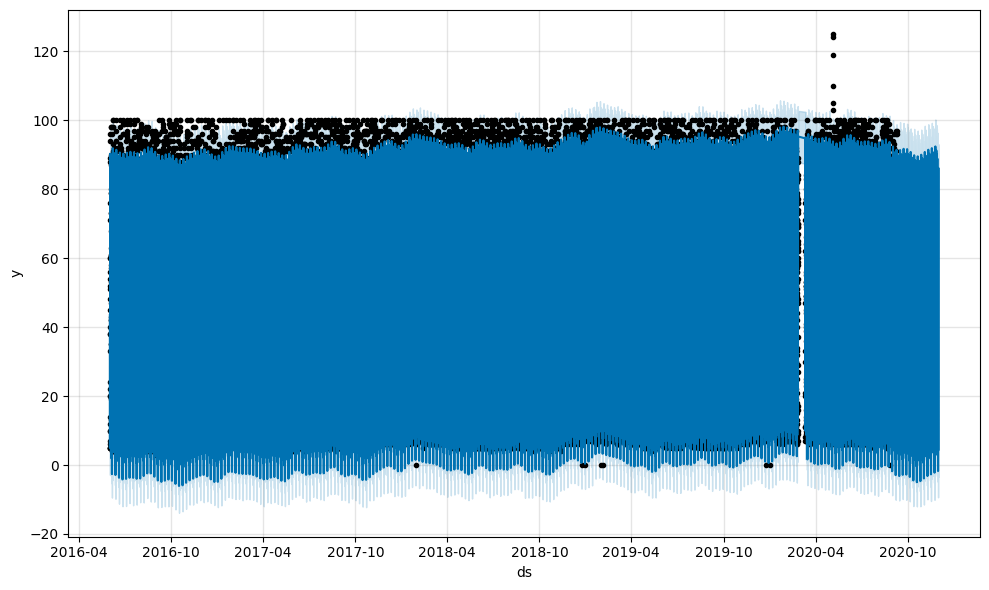

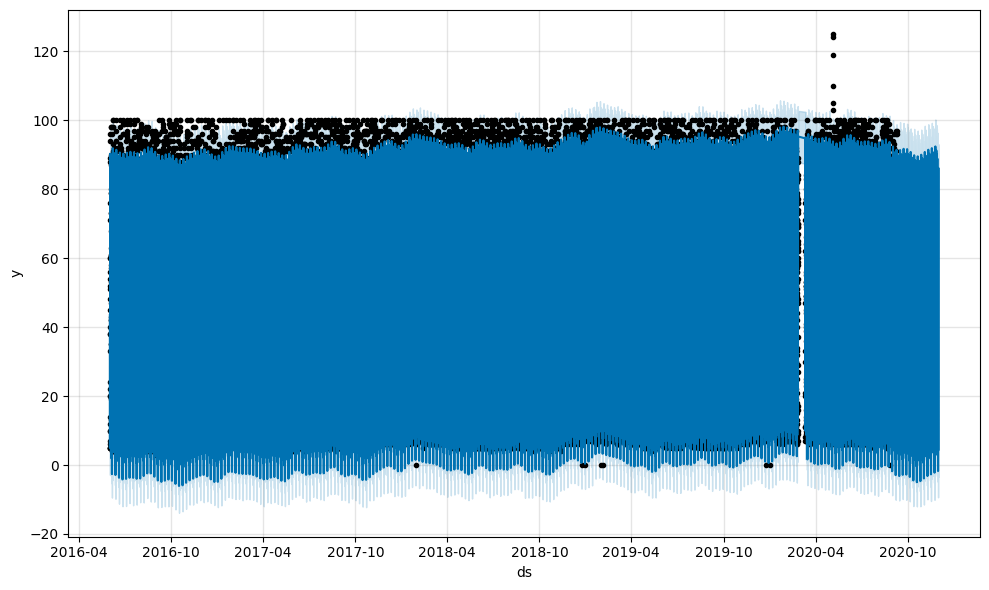

In [446]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
I would estimate that Mercardo trends are likely to increase in the future with a high degree of confidence. The predicted values are steadily higher than the historical data points. The uncertainty interval areound the predictions is narrow.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [447]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast = forecast.reset_index()
forecast = forecast.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
print(forecast[['yhat', 'yhat_lower', 'yhat_upper']].head(24))

print(forecast.head())



                          yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 04:00:00  43.469088   36.442641   51.551505
2016-06-01 05:00:00  27.575589   19.745427   34.836772
2016-06-01 06:00:00  15.189124    7.653652   22.628476
2016-06-01 07:00:00   7.522051   -0.008480   15.031172
2016-06-01 08:00:00   4.976541   -2.860048   12.124961
2016-06-01 09:00:00   7.352956    0.014363   14.689318
2016-06-01 10:00:00  13.831539    6.231519   21.241342
2016-06-01 11:00:00  22.929321   15.595283   30.532138
2016-06-01 12:00:00  32.738554   25.291555   39.784043
2016-06-01 13:00:00  41.477480   33.991516   48.939744
2016-06-01 14:00:00  48.044204   40.527102   55.418248
2016-06-01 15:00:00  52.226175   44.510482   59.424559
2016-06-01 16:00:00  54.515328   47.552035   61.398310
2016-06-01 17:00:00  55.789893   48.485379   63.375314
2016-06-01 18:00:00  57.121475   50.250098   65.052006
2016-06-01 19:00:00  59.672869   52.308130   66.907501
2016-06-01

Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

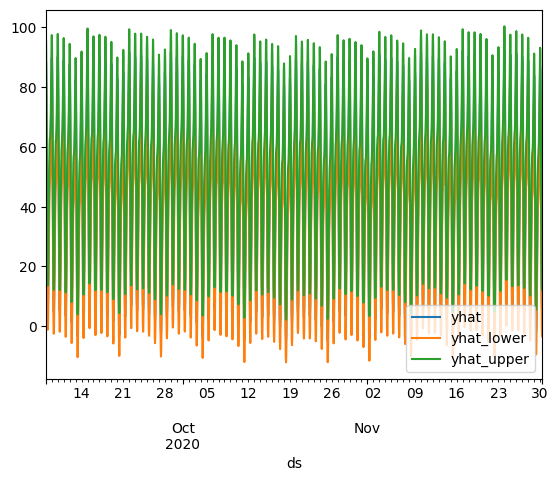

In [448]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot()




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2dac9m0/edns3owl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2dac9m0/6b7ev5kd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93499', 'data', 'file=/tmp/tmpx2dac9m0/edns3owl.json', 'init=/tmp/tmpx2dac9m0/6b7ev5kd.json', 'output', 'file=/tmp/tmpx2dac9m0/prophet_modelv1q25vtn/prophet_model-20240517231109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


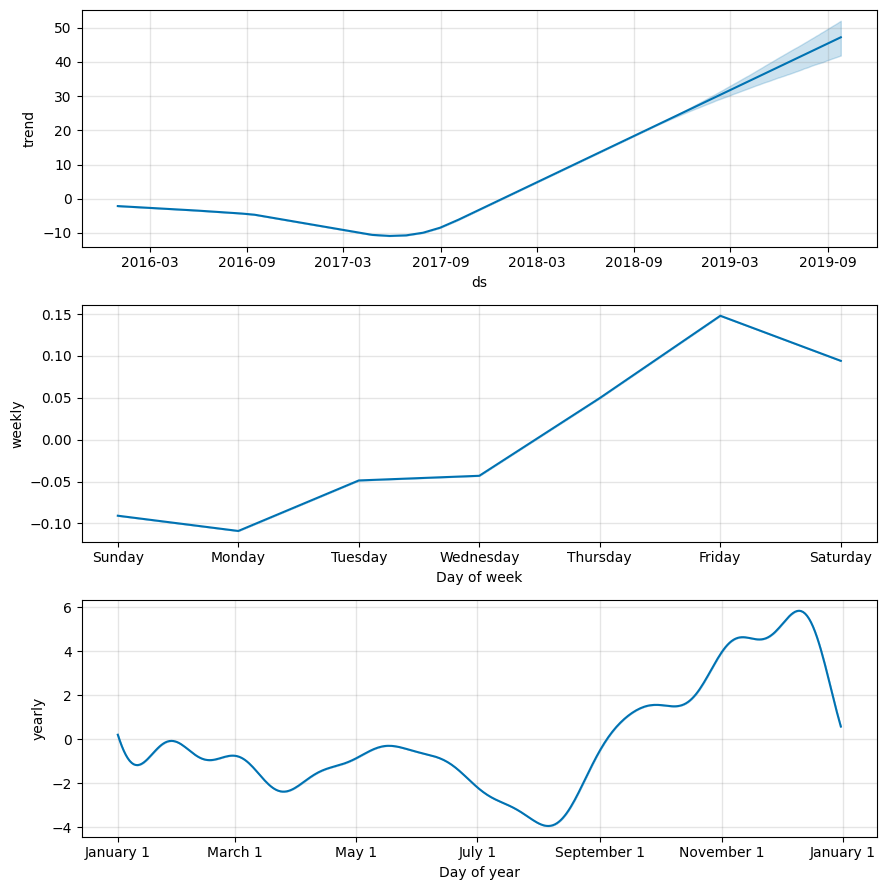

In [449]:
# Reset the index in the forecast_mercado_trends DataFrame
data = {
    'ds': pd.date_range(start='2016-01-01', periods=1000, freq='D'),
    'y' : np.random.randn(1000).cumsum()
}

forecast= pd.DataFrame(data)

forecast = forecast.reset_index(drop=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
model = Prophet()
model.fit(forecast)
future = model.make_future_dataframe(periods=365)
forecast_canada = model.predict(future)

fig = model.plot_components (forecast_canada)

plt.show()





##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
The greatest time of day appears to be late night peaking around midnight.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Thursday shows the highest peak in traffic during the week.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
The lowest point for search traffic in the calendar year appears to be between July and August.